In [43]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import time

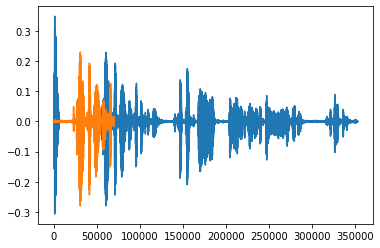

In [44]:
fig,ax = plt.subplots()
ax.plot(data)
ax.plot(data[30000:100000,])

In [64]:
time_sum = 0.0
for i in range(10):
    start = time.time()
    data, sr = librosa.load('data/test_file.aac',sr = None)
    time_sum = time_sum + time.time()-start
print(time_sum/10)

0.21893322467803955


In [65]:
print(data)
print(data.shape)
print(sr)
print(type(sr))

[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
(353756,)
32000
<class 'int'>


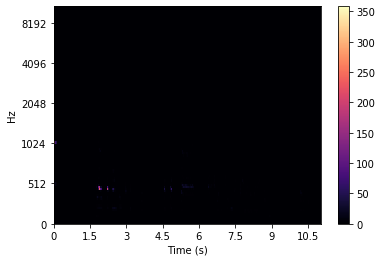

In [66]:
#mel is short for melody value, it corresponds to pitch
spec = librosa.feature.melspectrogram(y=data,
                                    sr = sr)
# To Display "mel Spectrogram"
import librosa.display
librosa.display.specshow(spec,
                        y_axis = 'mel',
                        x_axis = 's',
                        sr = sr)
plt.colorbar();

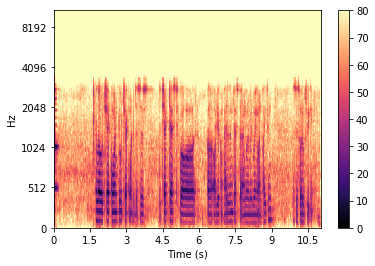

In [67]:
#Librosa inbuilt func to convert the amplitude square to decibels
db_spec =- librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,
                        y_axis='mel',
                        x_axis='s',
                        sr = sr)
plt.colorbar();

In [68]:
data_2,sr_2 = librosa.load('data/test_audio_2.aac', sr = None)

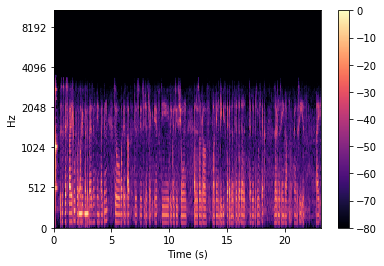

In [82]:
spec_2 = librosa.feature.melspectrogram(y = data_2,
                                       sr = sr_2)
db_spec_2 = librosa.power_to_db(spec_2, ref = np.max,)
librosa.display.specshow(db_spec_2,
                        y_axis = 'mel',
                        x_axis = 's',
                        sr = sr_2)
plt.colorbar();

###### Splits data_series into: 
    * harmonic (pitched sound,hear melodies and chords) and 
    * percussive (noise-like and instrument onsets like the hit on a drum or from consonants in speech)
 

In [84]:
data_h, data_p = librosa.effects.hpss(data_2)

spec_h = librosa.feature.melspectrogram(data_h, sr = sr_2)
spec_p = librosa.feature.melspectrogram(data_p, sr = sr_2)
db_spec_h = librosa.power_to_db(spec_h, ref = np.max)
db_spec_p = librosa.power_to_db(spec_p, ref = np.max)

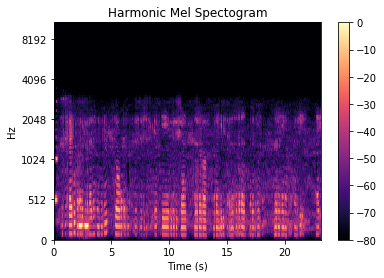

In [88]:
librosa.display.specshow(db_spec_h,
                        y_axis = 'mel',
                        x_axis = 's',
                        sr = sr_2)
plt.title('Harmonic Mel Spectogram')
plt.colorbar();


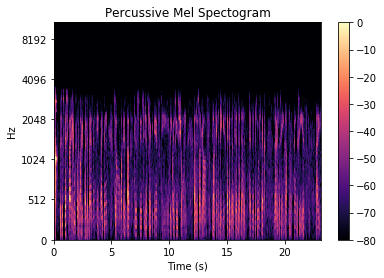

In [89]:
librosa.display.specshow(db_spec_p,
                        y_axis = 'mel',
                        x_axis = 's',
                        sr = sr_2)
plt.title('Percussive Mel Spectogram')
plt.colorbar();


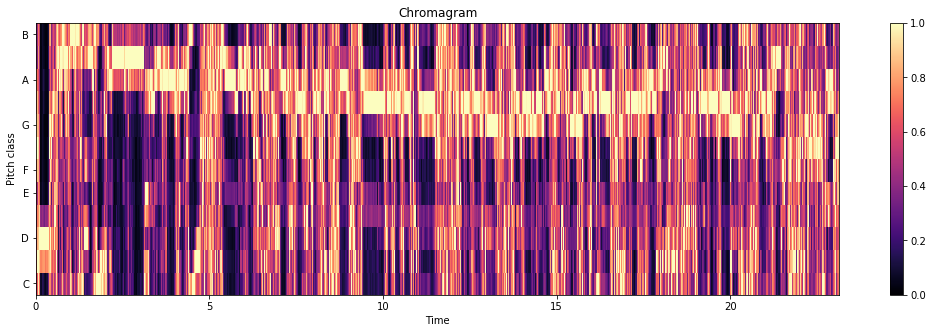

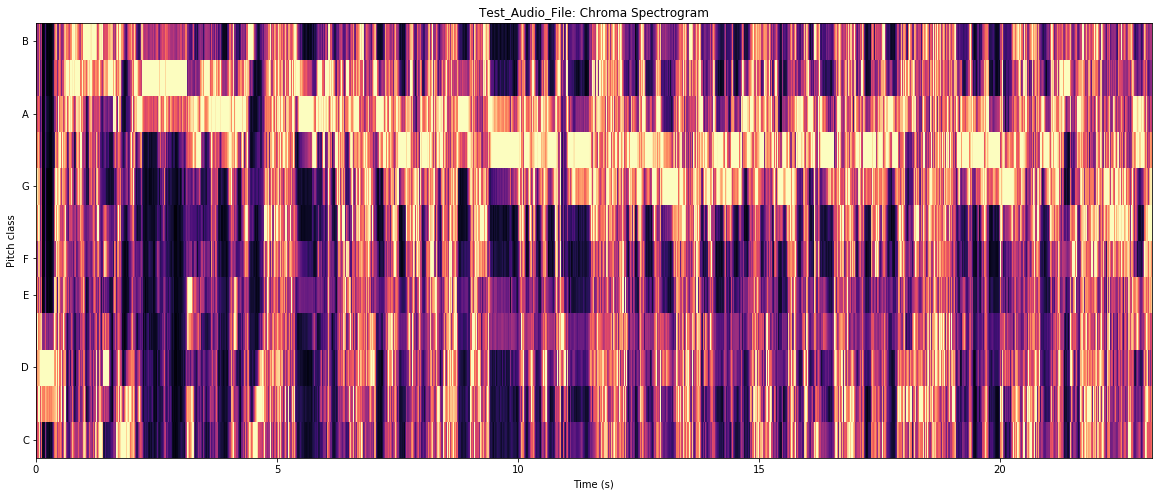

In [91]:
chroma = librosa.feature.chroma_cqt(y= data_2, sr = sr_2)

plt.figure(figsize = (18,5))
librosa.display.specshow(chroma, sr = sr_2, x_axis='time',y_axis='chroma', vmin=0,vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.figure(figsize = (20,8))
plt.title('Test_Audio_File: Chroma Spectrogram')
librosa.display.specshow(chroma, sr=sr_2, x_axis='s',y_axis='chroma');

##### To pick only first 10 secs of the audio clip

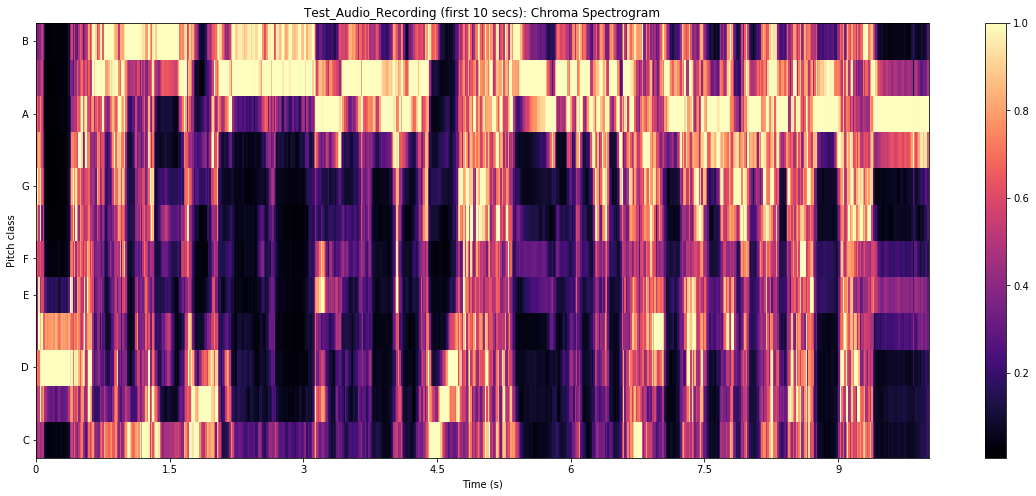

In [93]:
first_thirty_seconds = librosa.time_to_samples(10, sr=sr_2)
intro = data_2[:first_thirty_seconds]

intro_harm = librosa.effects.harmonic(intro)
intro_chroma = librosa.feature.chroma_cqt(intro_harm, sr=sr_2)

plt.figure(figsize=(20,8))
plt.title('Test_Audio_Recording (first 10 secs): Chroma Spectrogram')
librosa.display.specshow(intro_chroma, sr=sr_2, x_axis='s', y_axis='chroma', )
plt.colorbar();

###### To find tempo of the audio clip

In [96]:
print(librosa.beat.tempo(data_2,
                        sr = sr_2))

C:\Users\Swaroop\Desktop\Python\sample_project_1\env\lib\site-packages\librosa\beat.py:305: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  win_length = np.asscalar(core.time_to_frames(ac_size, sr=sr,


[117.1875]


In [97]:
print(librosa.beat.tempo(data,
                        sr = sr))

[120.96774194]


C:\Users\Swaroop\Desktop\Python\sample_project_1\env\lib\site-packages\librosa\beat.py:305: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  win_length = np.asscalar(core.time_to_frames(ac_size, sr=sr,
